In [1]:
#importing the libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import BisectingKMeans

In [2]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Load the dataset from the CSV file
df = pd.read_csv("Mall_Customers.csv")

In [6]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:

# Extracting the features for clustering (using only columns 'Annual Income (k$)' and 'Spending Score (1-100)')
X = df.iloc[:, [3, 4]].values  # Select columns 3 and 4 for clustering
print(X[1:4])

[[15 81]
 [16  6]
 [16 77]]


In [8]:
from sklearn.cluster import BisectingKMeans

In [24]:
# Initialize AgglomerativeClustering  with 5 clusters
BK = BisectingKMeans(n_clusters=5, random_state=0)


In [25]:
# Fit the model and predict the clusters
clusters = BK.fit_predict(X)

C:\Users\AB92922\anaconda3\lib\site-packages\sklearn\cluster\_bisect_k_means.py:247: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [26]:
# Add the cluster labels as a new column to the original DataFrame
df['Bisec_Cluster_Group'] = clusters

In [27]:
# Save the DataFrame with cluster labels to a CSV file
df.to_csv("Bisec_cluster.csv", index=False)

In [28]:
# Load the DataFrame from the CSV file (to ensure it was saved correctly)
Bisec_cluster = pd.read_csv("Bisec_cluster.csv")

In [29]:
# Ensure the columns for x, y, and hue are correctly specified for plotting
x_col = 'Annual Income (k$)'
y_col = 'Spending Score (1-100)'
hue_col = 'Bisec_Cluster_Group'

C:\Users\AB92922\anaconda3\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


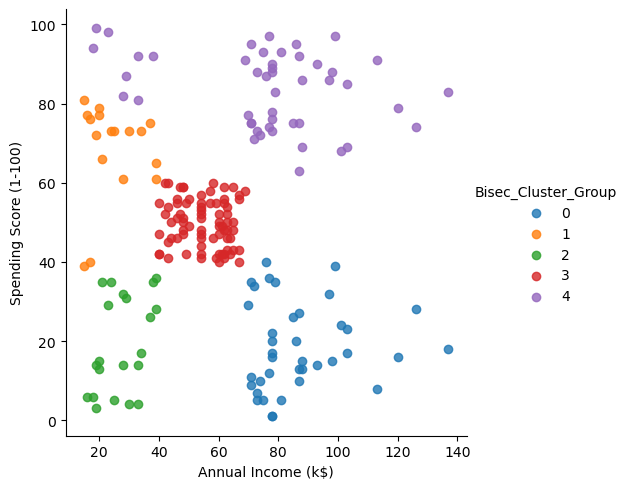

In [30]:
# Create the plot using Seaborn's lmplot
facet = sns.lmplot(
    data=Bisec_cluster,   # DataFrame containing the data to plot
    x=x_col,              # Column name for x-axis
    y=y_col,              # Column name for y-axis
    hue=hue_col,          # Column name for hue (coloring by cluster group)
    fit_reg=False,        # Disable regression line
    legend=True,          # Show legend
    legend_out=True       # Place the legend outside the plot
)

# Show the plot
plt.show()